# Necessary libraries

In [51]:
import pandas as pd

# Load data

In [52]:
def import_csv(file_path):
    event_log = pd.read_csv(file_path, sep=',')

    months = {
        'janeiro': 1,
        'fevereiro': 2,
        'março': 3,
        'abril': 4,
        'maio': 5,
        'junho': 6,
        'julho': 7,
        'agosto': 8,
        'setembro': 9,
        'outubro': 10,
        'novembro': 11,
        'dezembro': 12,
    }

    # Missing timestamp

    # Create a new column 'month_num' by mapping the 'Mês' column
    event_log['month_num'] = event_log['Mes'].str.lower().map(months)

    #create date column from year, month, and day columns
    event_log['time:timestamp'] = pd.to_datetime(dict(year=event_log.Ano, month=event_log.month_num, day=1))

    num_events = len(event_log)
    num_cases = len(event_log.Mentorado.unique())
    print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))

    columns_rename = {
        'Mentorado': 'case:concept:name',
        'Conquista': 'concept:name'
    }

    event_log = event_log.rename(columns=columns_rename)

    return event_log


event_log = import_csv("./data/mentorados_mentoria_dados_2024.csv")

Number of events: 104
Number of cases: 31


In [53]:
event_log.head()

,case:concept:name,concept:name,Descritivo da Conquista,Mes,Ano,month_num,time:timestamp
0,Gabriel Bueno Guimarães,emprego na área,Vaga na área ciência de dados,março,2024,3,2024-03-01
1,Lucas Fernando Alves Ferreira,emprego na área,Vaga na área ciência de dados,março,2024,3,2024-03-01
2,Ivan Felipe,emprego na área,Vaga analytics engineer no setor bancário,março,2024,3,2024-03-01
3,Sara Coutinho,participação hackathon,Equipe Vencedora Hackathon AI Microsoft,março,2024,3,2024-03-01
4,Antonia Juliana Rodrigues Silva,Estudos,Aprovada para o curso Talent Cloud Pro https:/...,abril,2024,4,2024-04-01


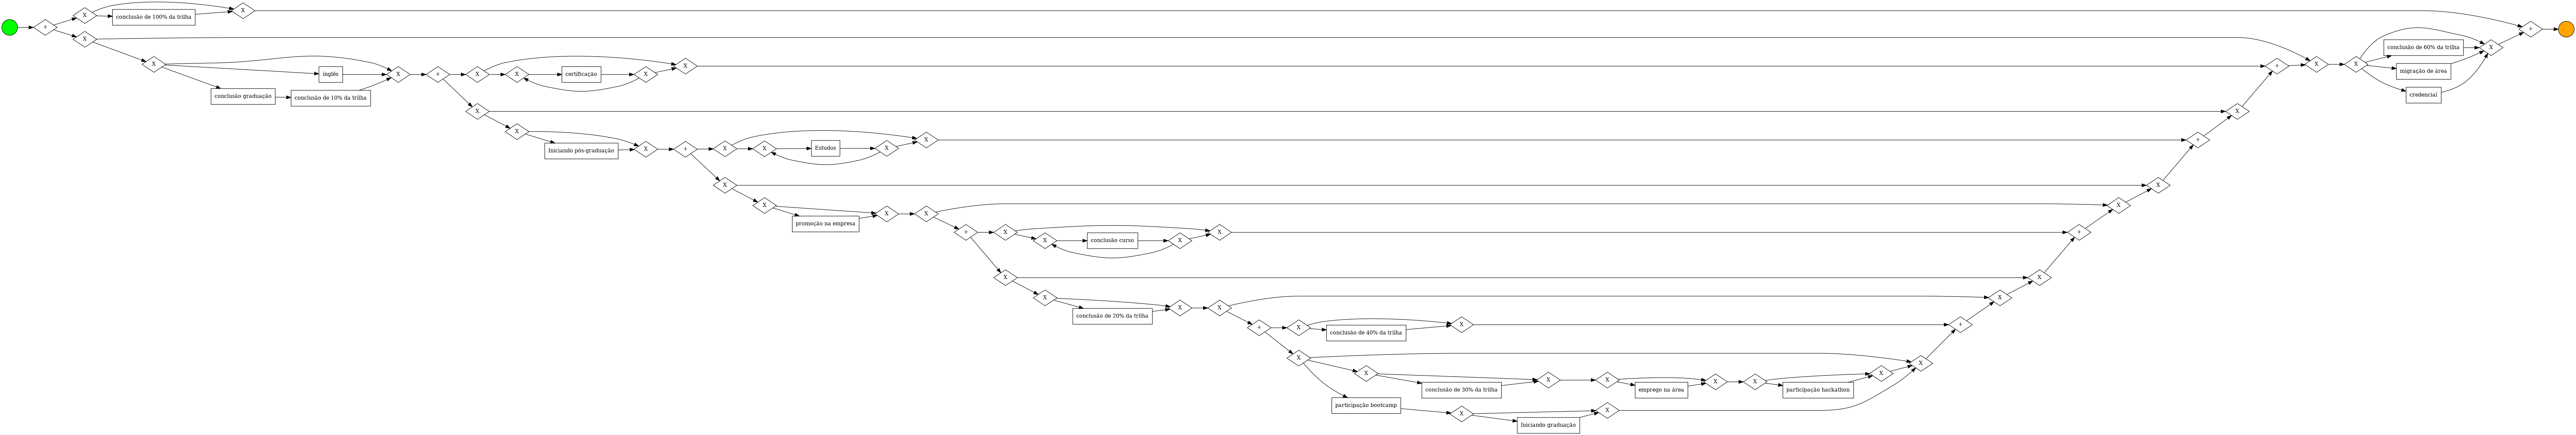

In [54]:
import pm4py

process_tree = pm4py.discover_process_tree_inductive(event_log)
# pm4py.view_process_tree(process_tree)
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

# DFG (performance)

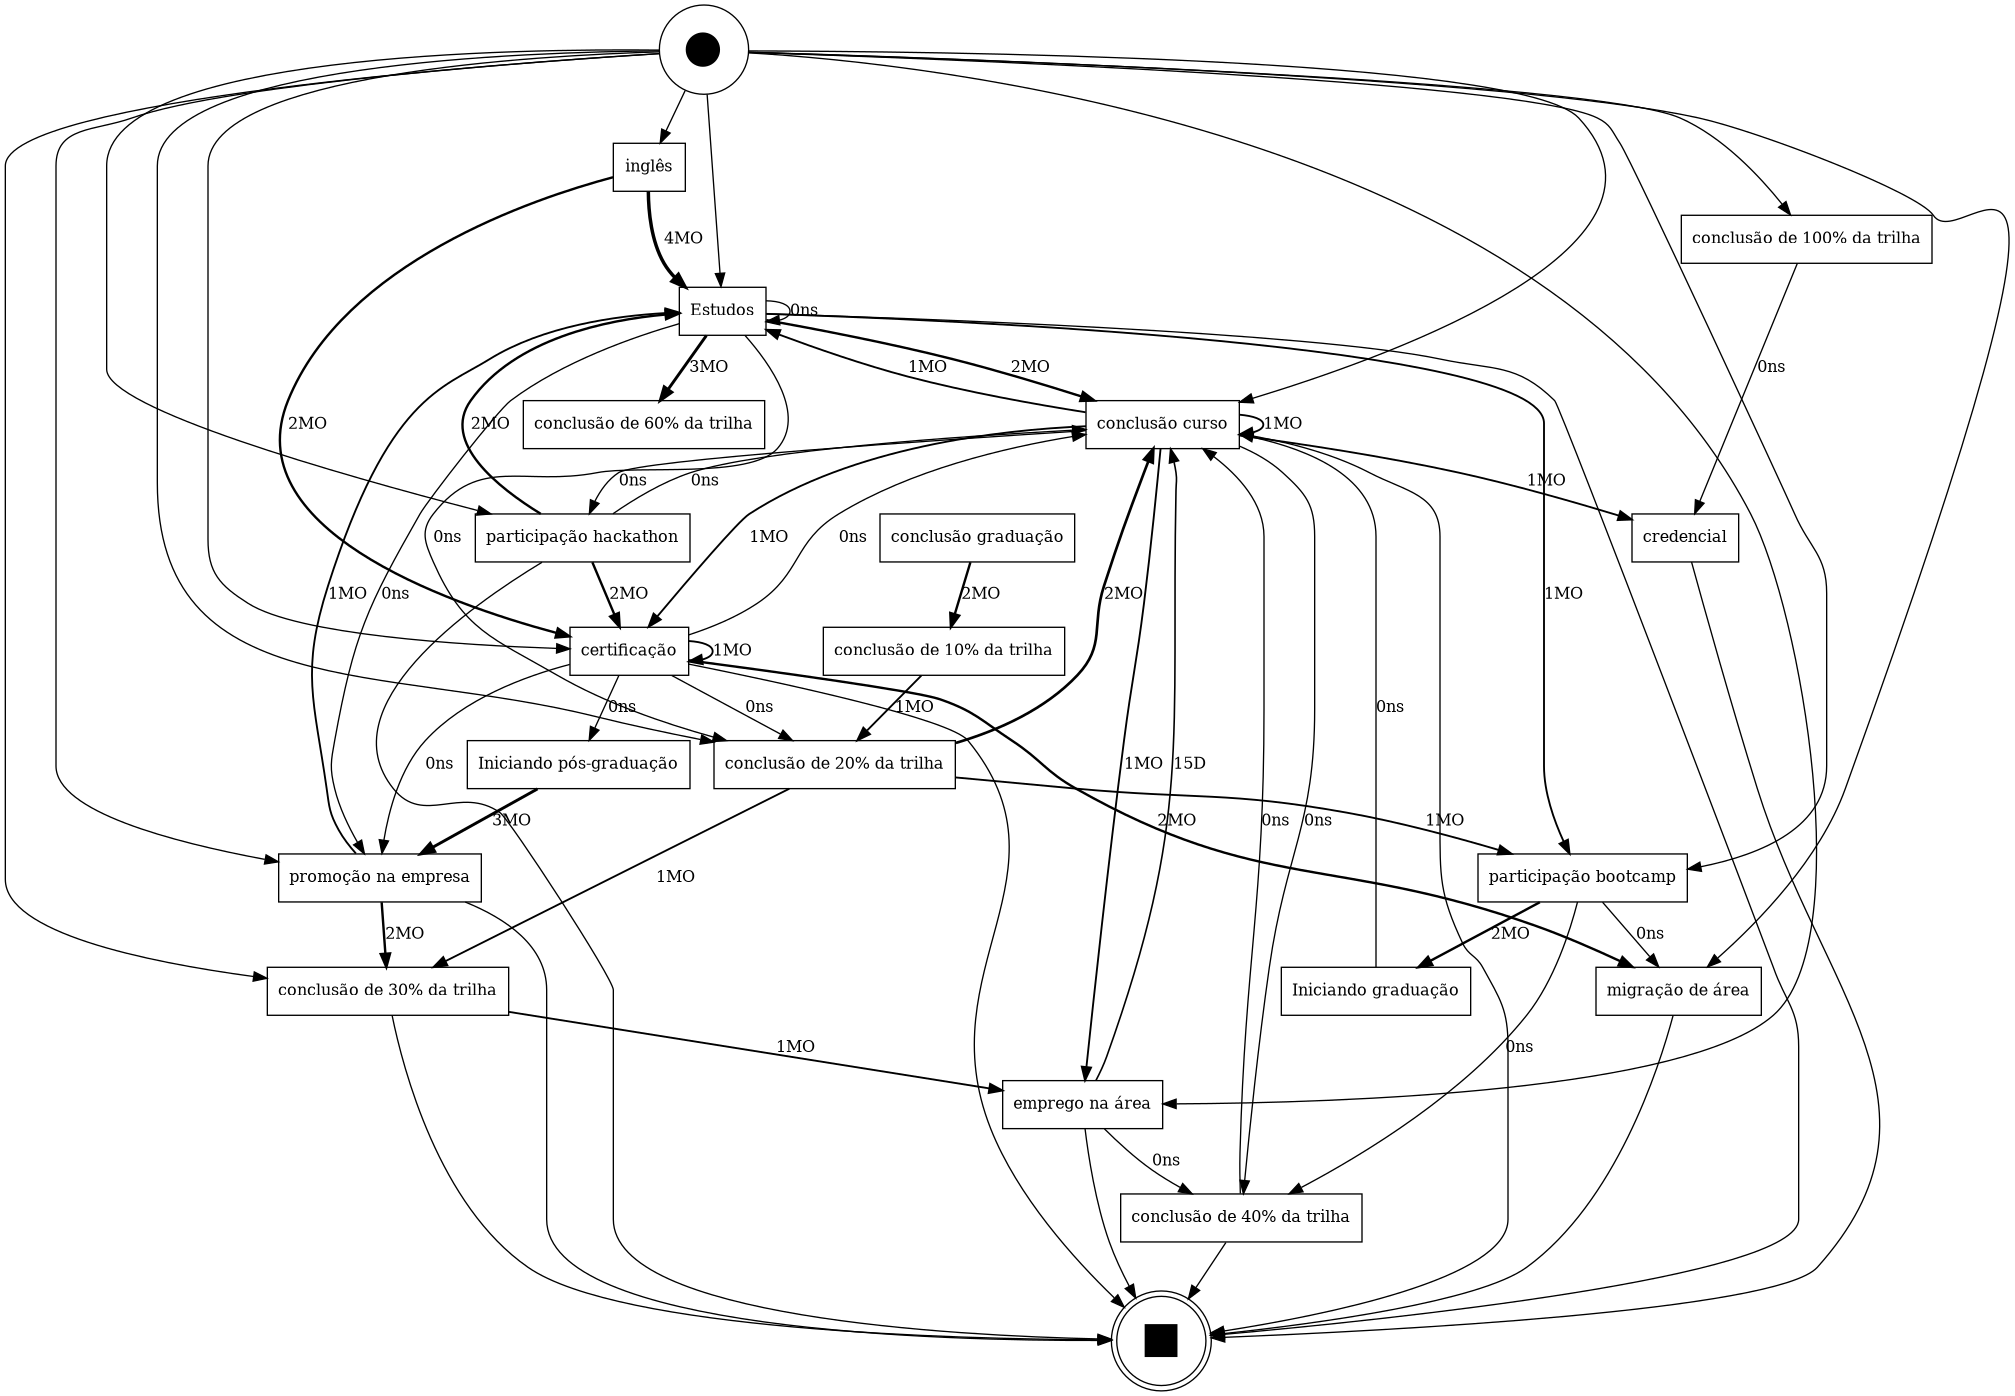

In [55]:


dfg, start_activities, end_activities = pm4py.discover_performance_dfg(event_log)
pm4py.view_performance_dfg(
    dfg,
    start_activities,
    end_activities,
    aggregation_measure='median', # small dataset, possibly has outliers
    rankdir='TB'
)

# DFG (Frequency)

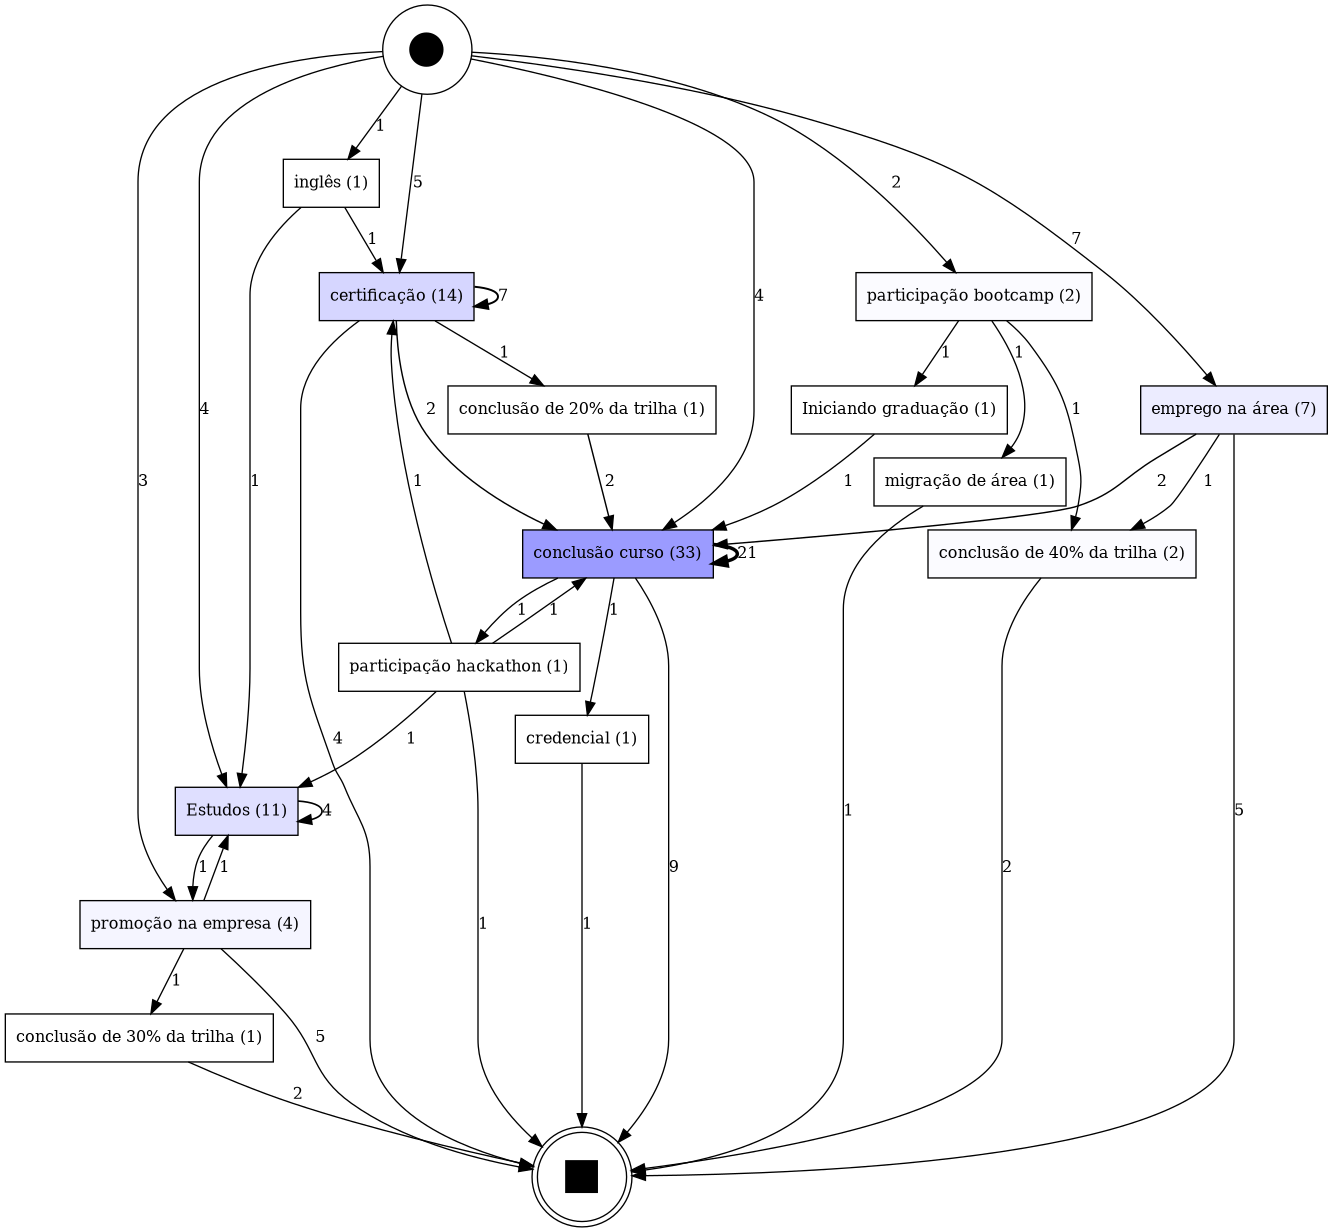

In [66]:
from pm4py.algo.filtering.dfg.dfg_filtering import filter_dfg_on_activities_percentage, filter_dfg_on_paths_percentage

dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)

activities_count = event_log['concept:name'].value_counts().to_dict()

# activities (square) filter
# percentage = 0.6
# dfg, start_activities, end_activities, activities_count = (
#     filter_dfg_on_activities_percentage(
#         dfg, start_activities, end_activities, activities_count, percentage
#     )
# )

# paths (lines) filter
percentage = 0.5
dfg, start_activities, end_activities, activities_count = (
    filter_dfg_on_paths_percentage(
        dfg, start_activities, end_activities, activities_count, percentage
    )
)

pm4py.view_dfg(dfg, start_activities, end_activities, rankdir='TB')


# Heuristics Miner

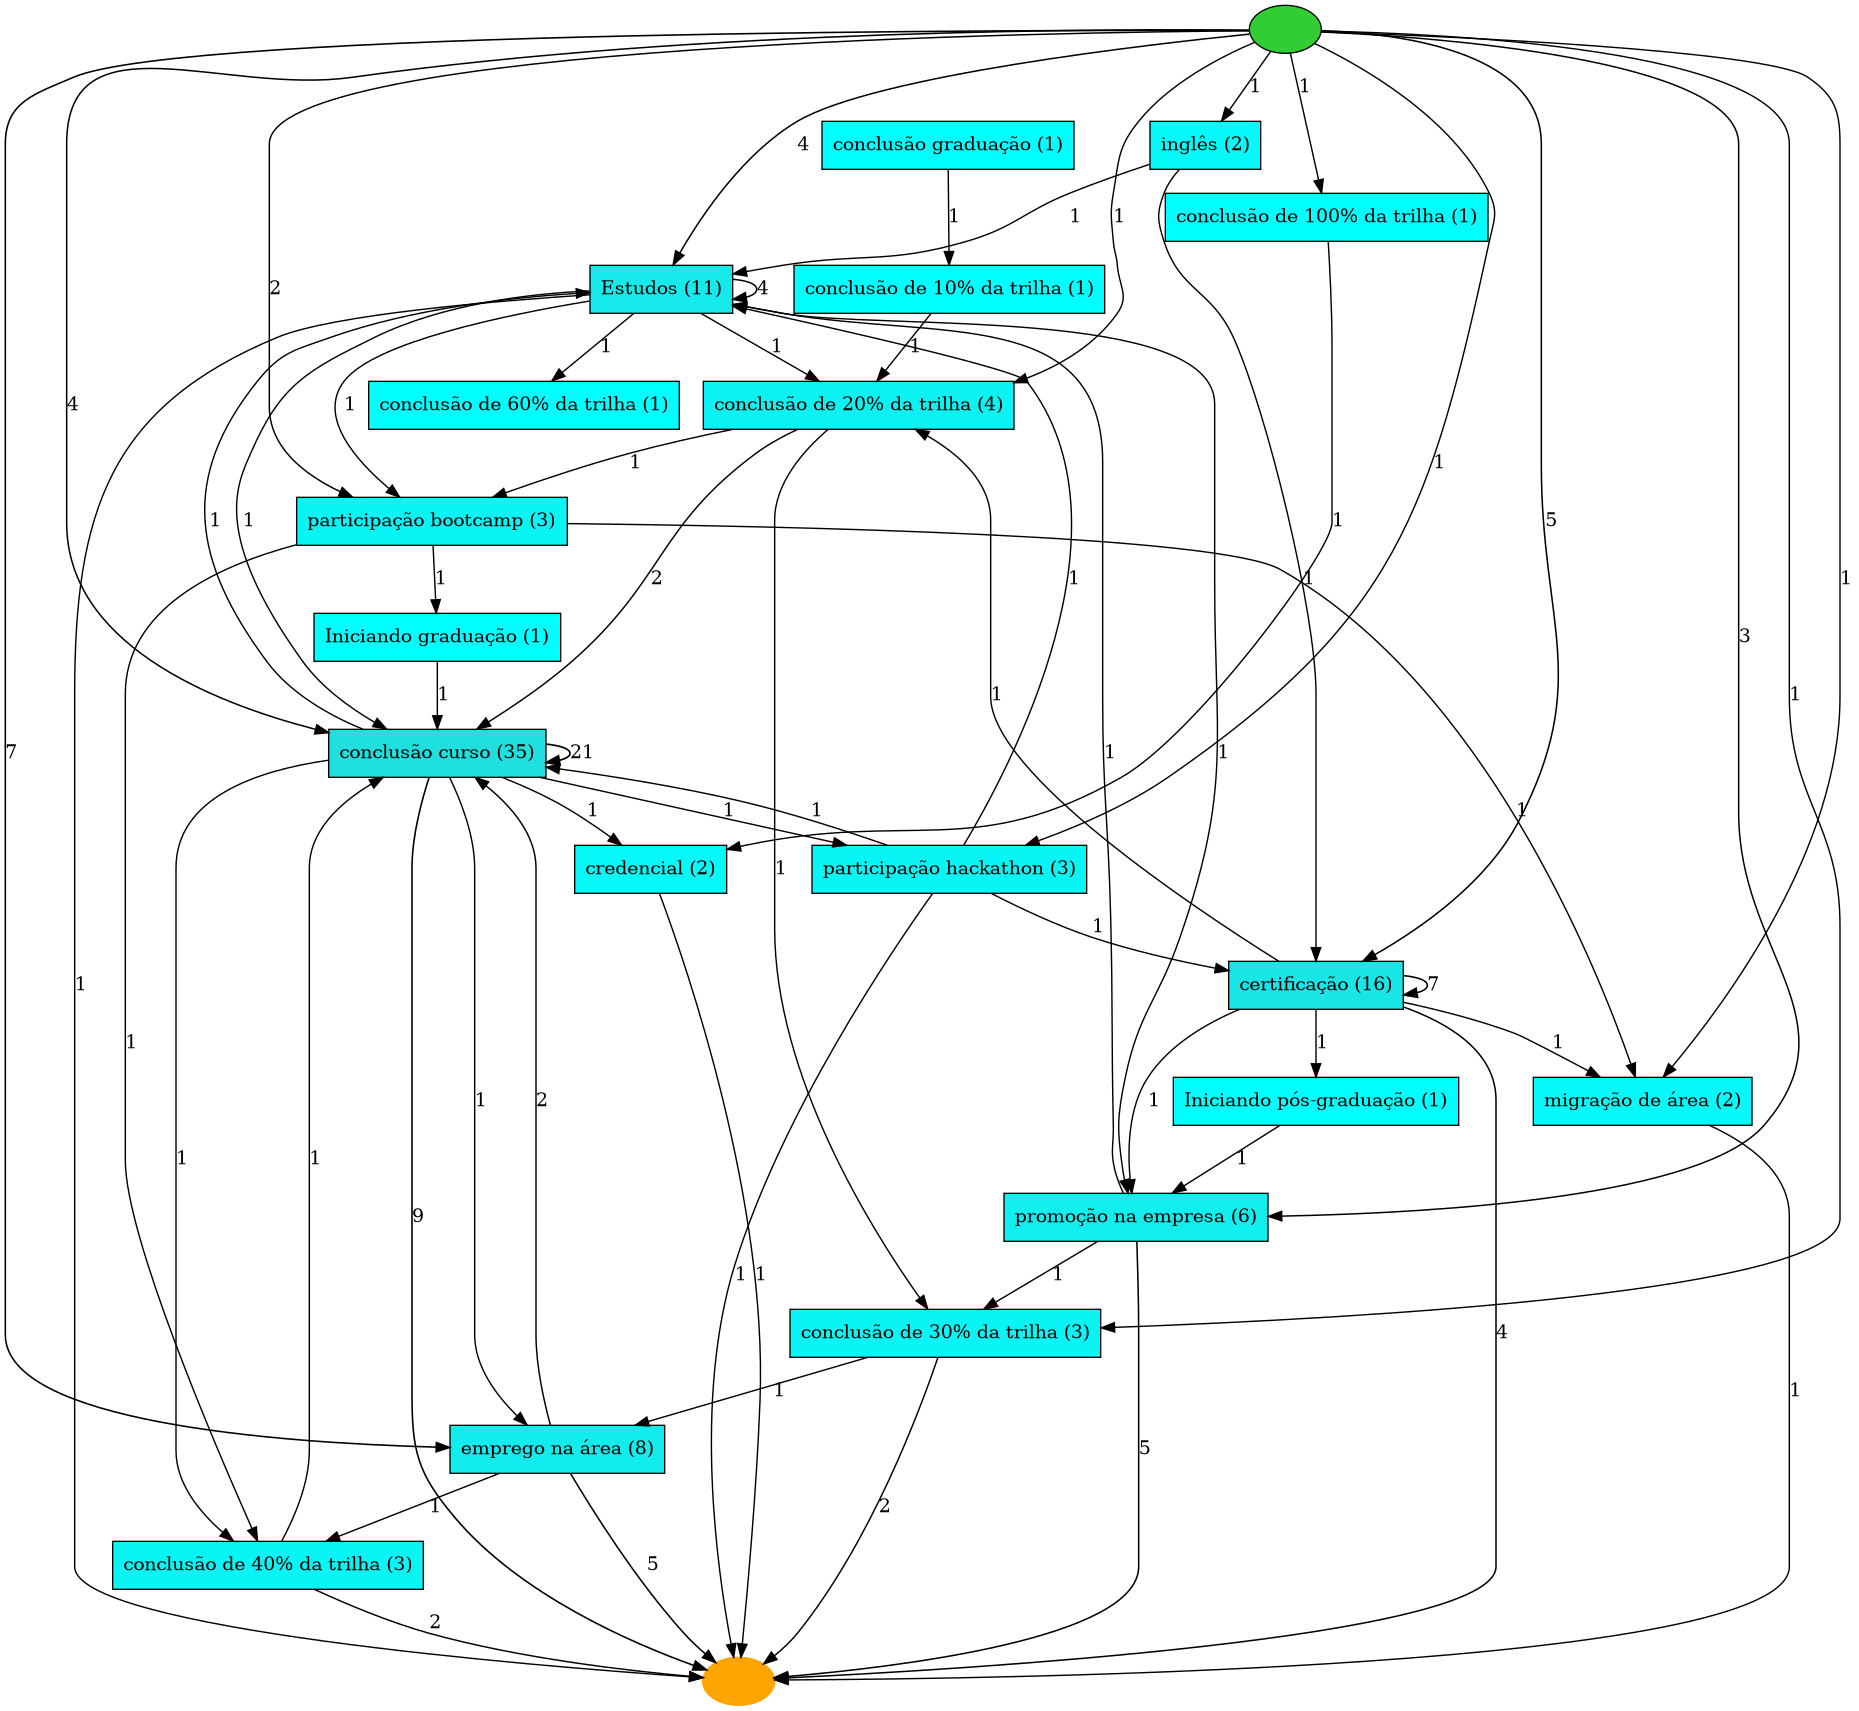

In [38]:
map = pm4py.discover_heuristics_net(event_log)
pm4py.view_heuristics_net(map)